# Rank-k matrix
the best rank-1 approximation to the matrix:
\begin{equation}\label{eq:1}
M = \begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6
\end{bmatrix}
\end{equation}


In [1]:
import numpy as np

a = np.array([[1,2,3], [4,5,6]])
U, L, VT = np.linalg.svd(a, full_matrices=0)
U[0,:].reshape(-1, 1) * L[0] * VT[0,:]

array([[ 1.57454629,  2.08011388,  2.58568148],
       [ 3.75936076,  4.96644562,  6.17353048]])

# Gram matrix
the 4 x 4 Gram matrix for the following data set of four points in $R^3$:
(1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)

In [5]:
G = np.matrix([[1,0,0],[1,0,1],[1,1,0],[1,1,1]]) * np.transpose(np.matrix([[1,0,0],[1,0,1],[1,1,0],[1,1,1]]))

# An experiment with PCA

The animals with attributes data set: http://attributes.kyb.tuebingen.mpg.de This is a small data set that has information about 50 animals. The animals are listed in classes.txt. For each animal, the information consists of values for 85 features: does the animal have a tail, is it slow, does it have tusks, etc. The details of the features are in predicates.txt. The full data consists of a 50x85 matrix of real values, in predicate-matrix-continuous.txt.

Visualize these animals in 2-d by using PCA projection from $R^85$ to $R^2$. Show the position of each animal, and label them with their names.

In [7]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

with open('./Animals_with_Attributes/predicate-matrix-continuous.txt') as f:
    content = f.readlines()
    for i in xrange(0, len(content)):
        content[i] = np.array([float(s) for s in content[i].split()])
        
pca = PCA(n_components=2, svd_solver='full')
c_tran = pca.fit_transform(content)

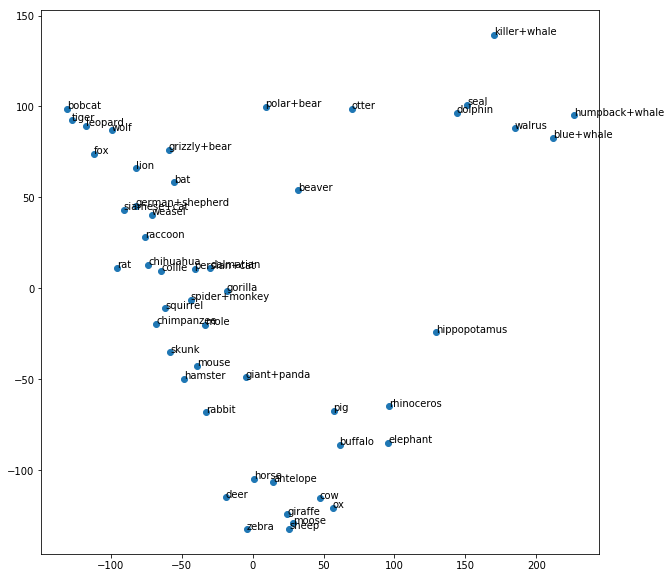

In [12]:
with open('./Animals_with_Attributes/classes.txt') as f:
    inputs = [line.split() for line in f]
names = [i[1] for i in inputs]
 
fig, ax = plt.subplots()
ax.scatter(c_tran[:,0], c_tran[:,1])

for i, name in enumerate(names):
    ax.annotate(name, (c_tran[:,0][i],c_tran[:,1][i]))

plt.show()
#fig.savefig('./Animals_with_Attributes/animals.png')

#not API
# Cov = np.cov(np.transpose(np.array(content)))
# L, U = np.linalg.eig(Cov)
# (u1, u2) = (U[:,0], U[:,1])
# c_tran = np.array([[float(u1.dot(content[i])), float(u2.dot(content[i]))] for i in xrange(0, len(content))])

# Classical multidimensional scaling

use classical multidimensional scaling to reconstruct the locations of ten US cities given only the distances between them.

In [18]:
with open('./distances.txt') as f:
    D = f.readlines()
    for i in xrange(0, len(D)):
        D[i] = [int(s) for s in D[i].split(',')]

H = np.identity(len(D)) - 1.0/len(D) * np.ones((len(D), len(D)))
D = np.array(D)**2
B = -1.0/2 * H * D * H
L, U = np.linalg.eig(B)
#Y = U * np.sqrt(L)

In [19]:
# LU = [[L[i], U[:,i]] for i in xrange(len(L))]
# LU.sort()
# LU.reverse()
# nL = [i[0] for i in LU]
# nL[-1] = 0
# nU = [i[1] for i in LU]

In [20]:
from sklearn.manifold import MDS 

mds = MDS(dissimilarity='precomputed')
mds.fit(np.array(D))
mds.embedding_

array([[ -288417.92130987, -1314788.50163739],
       [-1212433.18739404, -2517039.25542011],
       [ -384350.95538804,  -739541.78747348],
       [  237057.26243668,   876169.00864178],
       [  212842.62758813,  -280467.65941239],
       [   15261.5769478 , -2507965.37994639],
       [ -979024.19622846, -2182356.98447471],
       [  978792.46950527,  2371460.86762433],
       [  995383.0586606 ,  3068163.322251  ],
       [  424889.26518194,  3226366.36984735]])